In [1]:
import os
import pandas as pd 
import glob
import random 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


In [2]:
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',680)

## Read in data: 

In [4]:
trx = pd.read_csv('../diaries_transactions_all.csv', low_memory = False)

##  Formal Loans (FRMLN)

Step 1: Subset to loans w/ FRMLN designation: 

In [5]:
frmln_trx = trx.loc[trx['trx_family_code']=="FRMLN"]
frmln_trx.shape

(1429, 58)

Step 2: What are the different types of formal loans and how many are there? 

In [7]:
frmln_trx.loc[frmln_trx['unique_accnts']==1].trx_type_desc.value_counts()

Individual Business or Agriculture Loan      48
Consumer/ personal loan (not payday loan)    33
Hire Purchase                                24
Joint liability loan                         21
M-SHWARI Loan                                14
School Fees Loan                             12
Group Enterprise Loan                         2
Payday loan                                   2
Credit card (including store card)            2
Student loan                                  1
Name: trx_type_desc, dtype: int64

In [16]:
frmln_trx.loc[frmln_trx['unique_accnts']==1].trx_type_code.value_counts()

2760    48
2762    33
3398    24
3247    21
4219    14
3397    12
2761     2
2746     2
3502     2
2759     1
Name: trx_type_code, dtype: int64

Step 3: Observe the graphs of each kind of loan. 

0 105136540140100000
Error neither increase nor decrease at index19299
(9, 59)
1 57134685477600000
Error neither increase nor decrease at index13630
(15, 59)
2 57134649143400000
Error neither increase nor decrease at index20193
(10, 59)
3 105137049319900000
Error neither increase nor decrease at index3193
(6, 59)
4 57137411761700000
Error neither increase nor decrease at index23999
(6, 59)
5 112137336779100000
Error neither increase nor decrease at index18186
(7, 59)
6 57136557858500000
Error neither increase nor decrease at index15772
(12, 59)
7 56134798164800000
Error neither increase nor decrease at index1078
(9, 59)
8 89136850574400000
Error neither increase nor decrease at index2961
(1, 58)
Loan has only 1 entry for 89136850574400000
9 59134666467600000
Error neither increase nor decrease at index19693
(22, 59)
10 84136886562100000
Error neither increase nor decrease at index2952
(10, 59)
11 61134822416500000
Error neither increase nor decrease at index19830
(4, 59)
12 60136436488

/Users/juliacluceru/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


26 59134942576600000
Error neither increase nor decrease at index7400
(12, 59)
27 61134798041100000
(14, 59)
28 59134752569200000
Error neither increase nor decrease at index19873
Error neither increase nor decrease at index24068
(14, 59)
29 60136369837500000
Error neither increase nor decrease at index8199
(4, 59)
30 61134788847800000
Error neither increase nor decrease at index9034
(3, 59)
31 59134745004500000
Error neither increase nor decrease at index3402
(6, 59)
32 60137430710900000
Error neither increase nor decrease at index27
(6, 59)
33 59136998025000000
Error neither increase nor decrease at index4020
(8, 59)
34 61134797983800000
(11, 59)
35 63134743376000000
Error neither increase nor decrease at index14628
(2, 59)
36 62137146410500000
Error neither increase nor decrease at index22533
(11, 59)
37 84136879000800000
Error neither increase nor decrease at index9403
(9, 59)
38 34138312989600000
Error neither increase nor decrease at index10747
Error neither increase nor decrease

136 84136514094000000
Error neither increase nor decrease at index19561
(11, 59)
137 56134804437500000
Error neither increase nor decrease at index16949
(15, 59)
138 56134760823800000
Error neither increase nor decrease at index13371
(8, 59)
139 56134756074400000
Error neither increase nor decrease at index11691
(16, 59)
140 50137023475700000
Error neither increase nor decrease at index19144
(12, 59)
141 61135352095000000
Error neither increase nor decrease at index16054
(15, 59)
142 59134865220800000
Error neither increase nor decrease at index24633
Error neither increase nor decrease at index14442
(14, 59)
143 59137629648900000
Error neither increase nor decrease at index15503
(6, 59)
144 105137769890900000
Error neither increase nor decrease at index3304
(2, 59)
145 62135858405800000
(15, 59)
146 57135920565300000
Error neither increase nor decrease at index3988
(8, 59)
147 105137058969100000
Error neither increase nor decrease at index4953
(3, 59)
148 61134822448900000
Error neithe

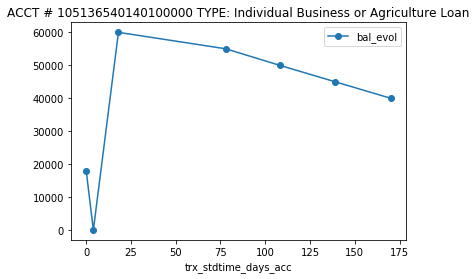

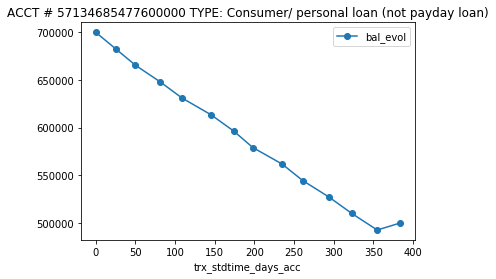

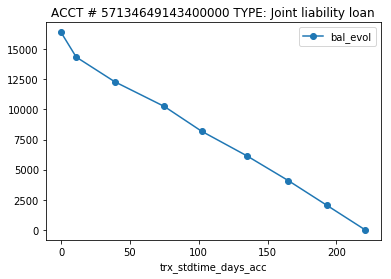

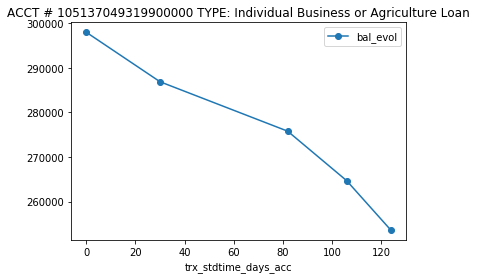

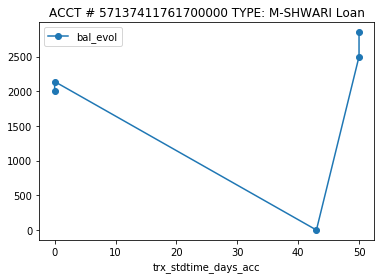

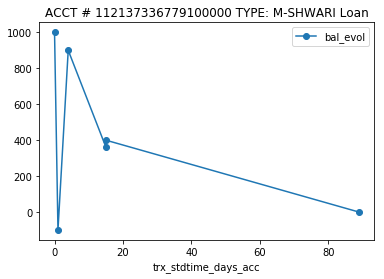

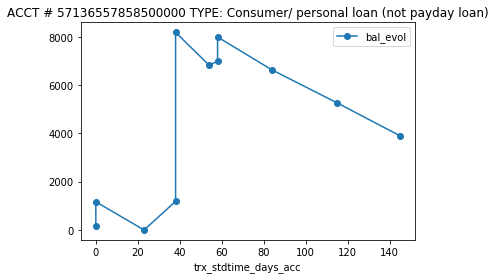

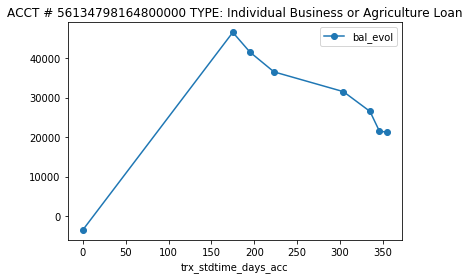

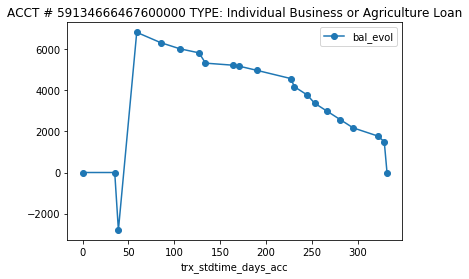

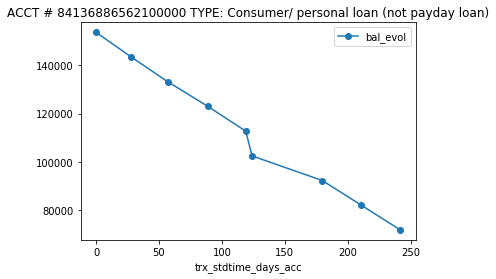

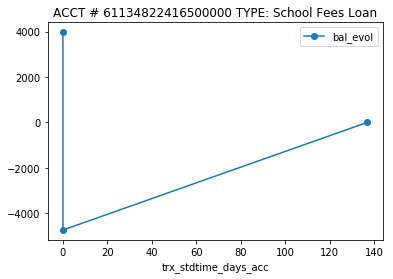

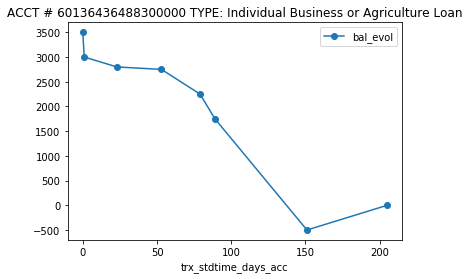

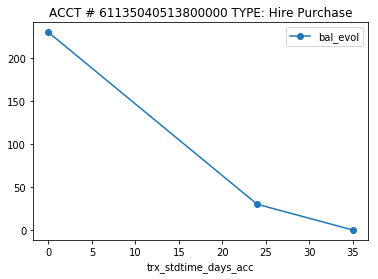

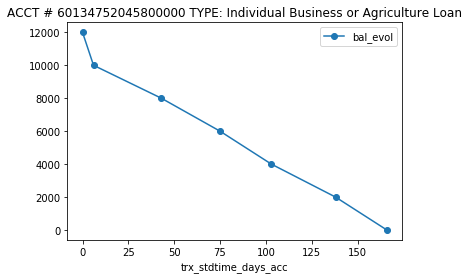

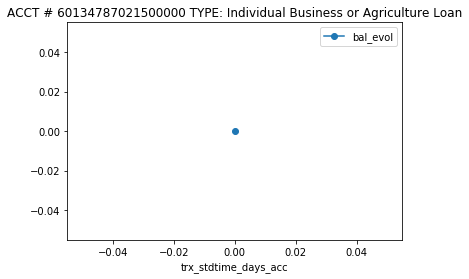

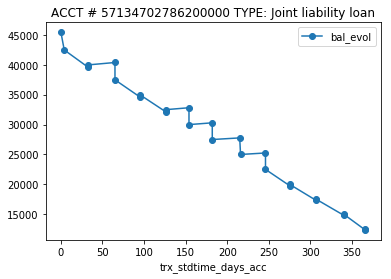

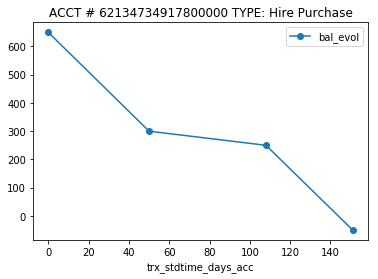

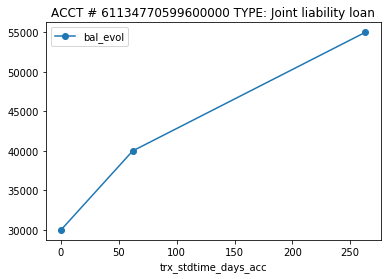

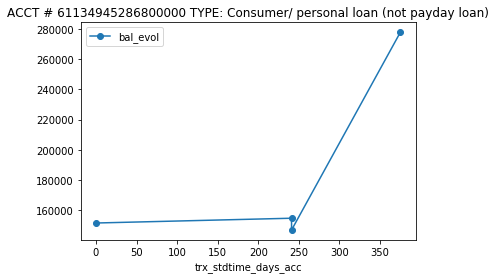

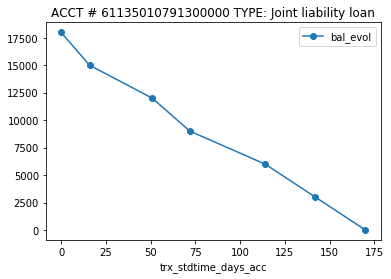

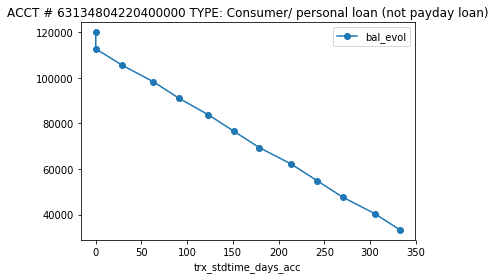

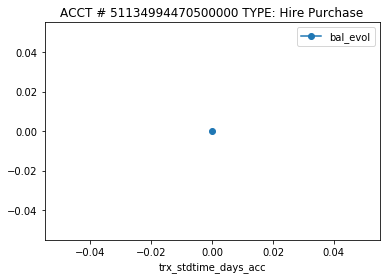

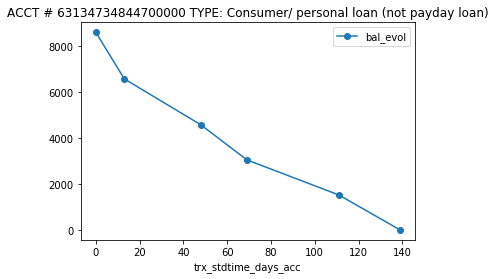

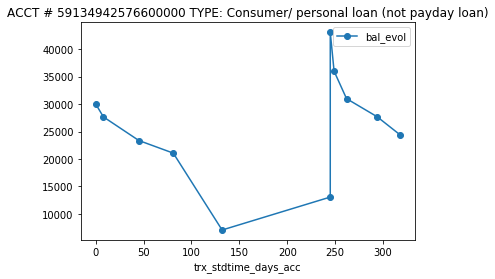

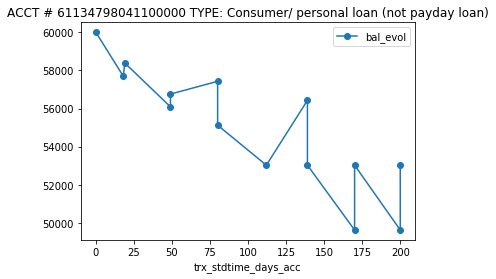

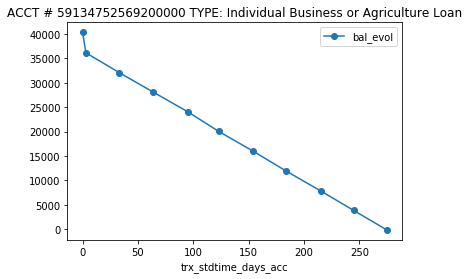

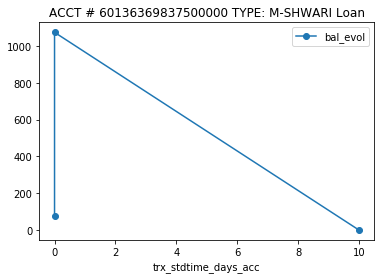

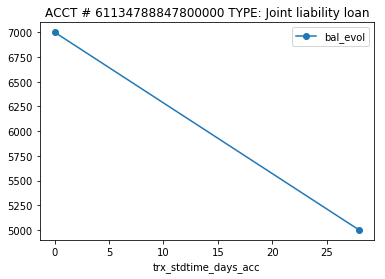

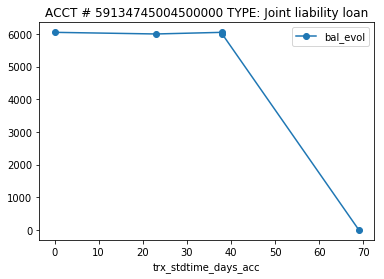

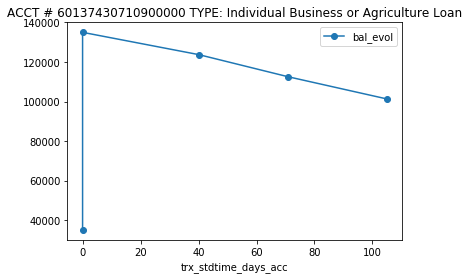

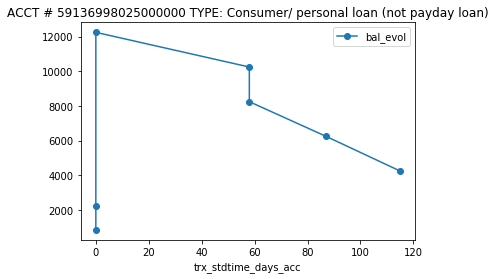

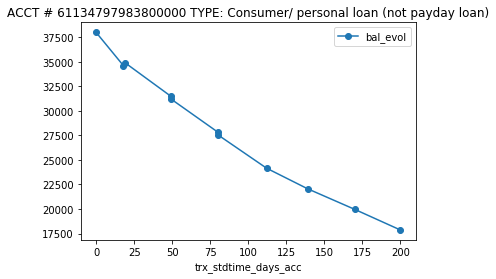

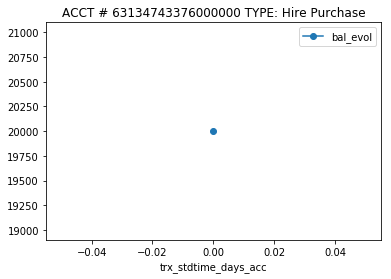

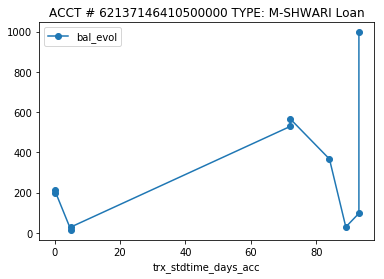

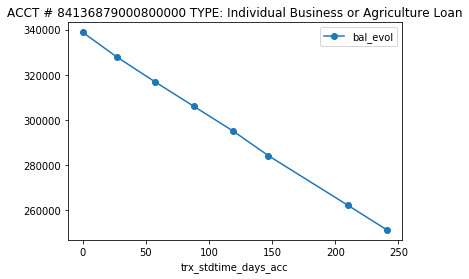

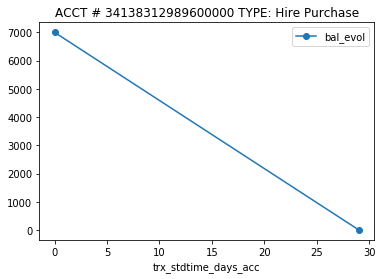

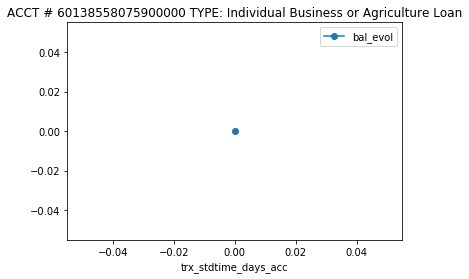

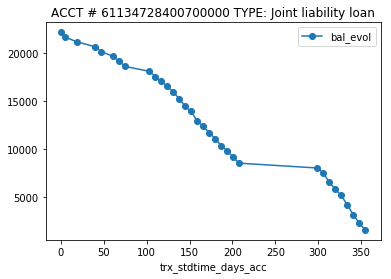

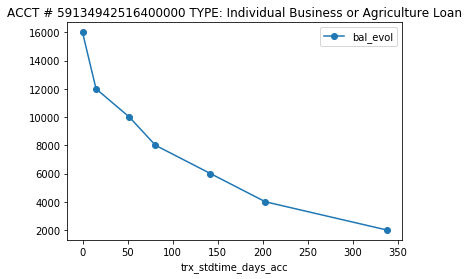

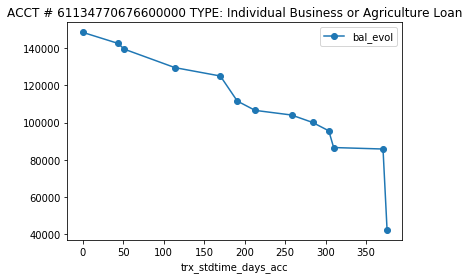

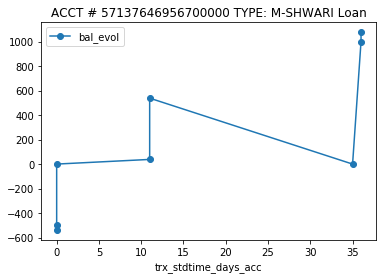

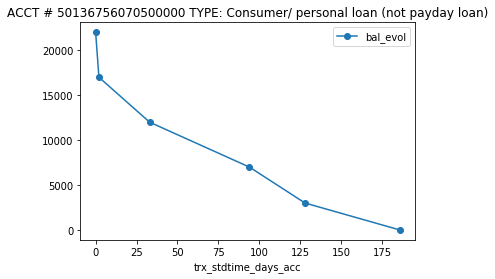

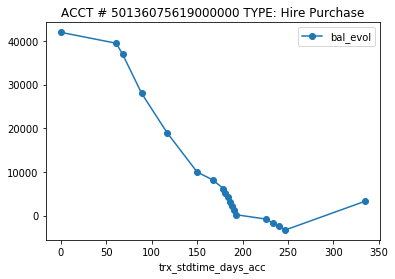

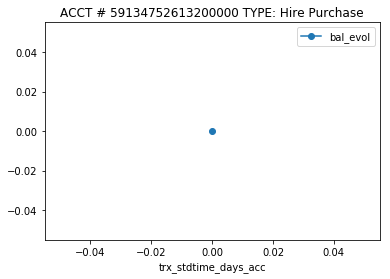

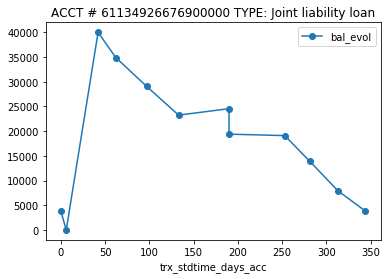

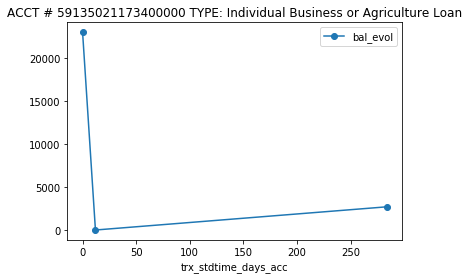

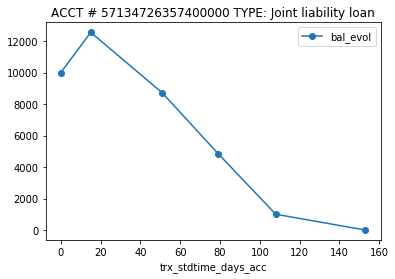

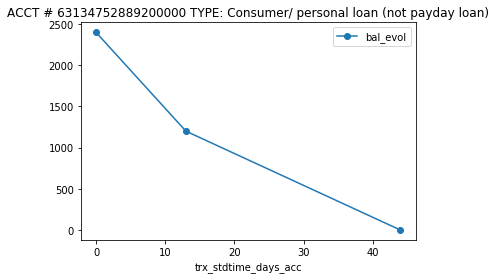

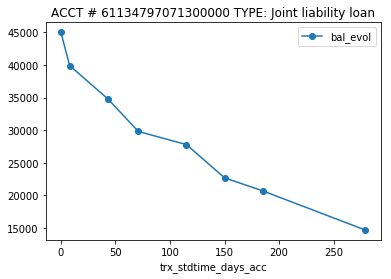

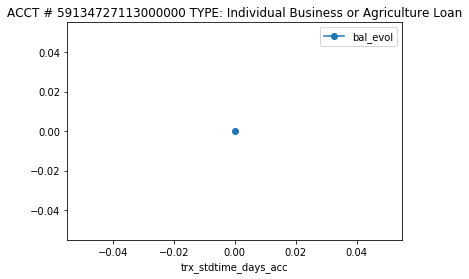

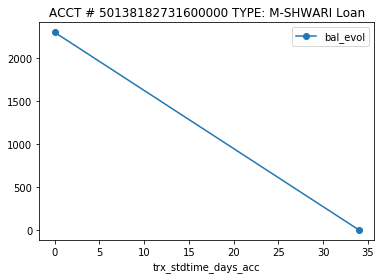

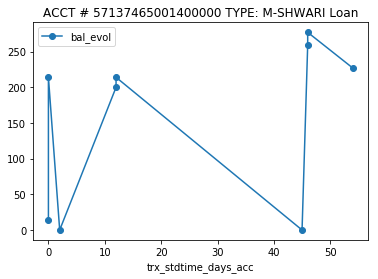

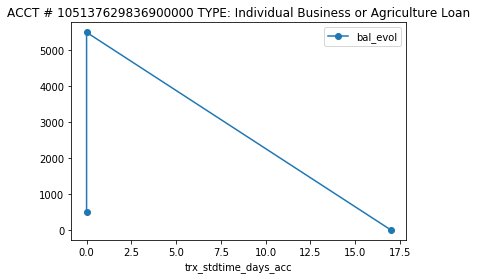

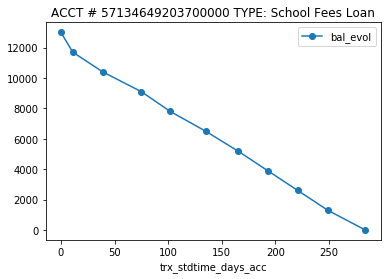

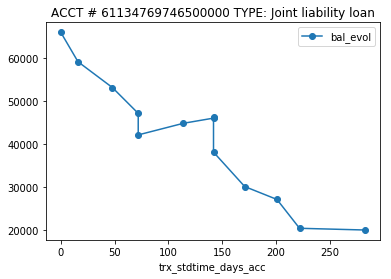

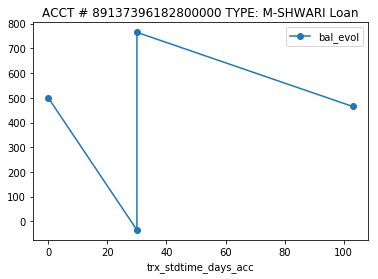

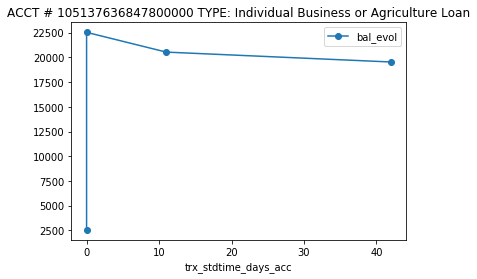

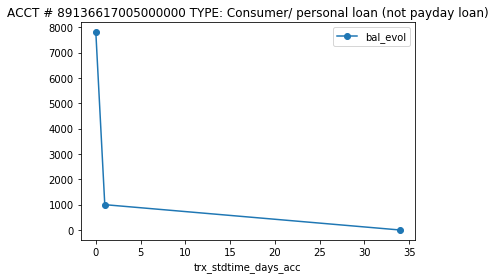

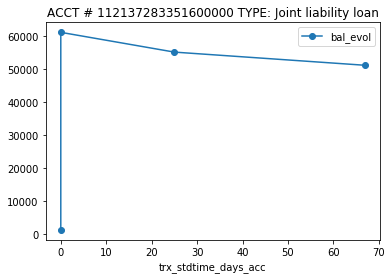

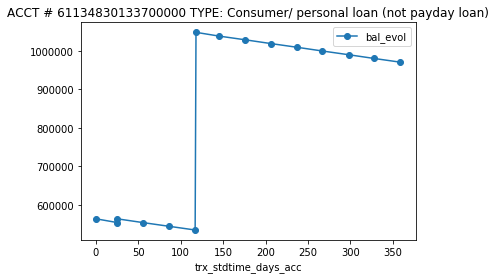

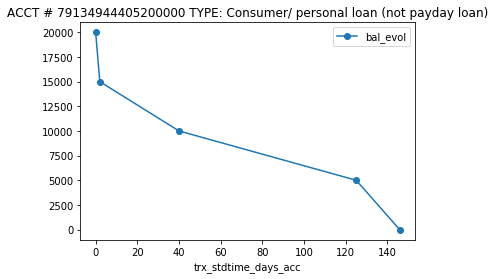

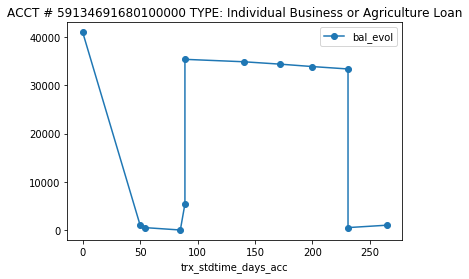

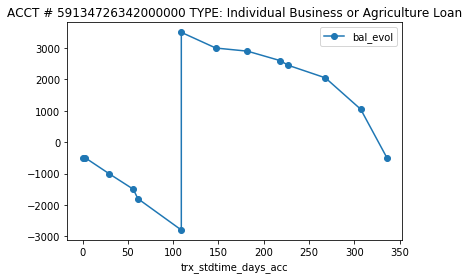

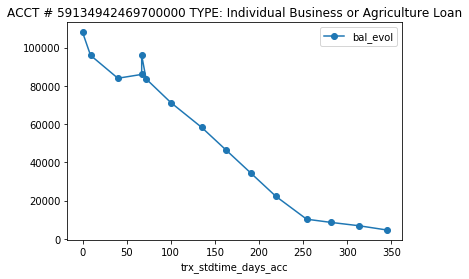

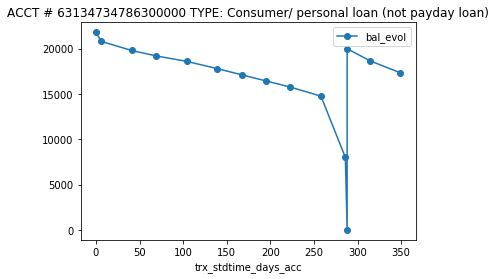

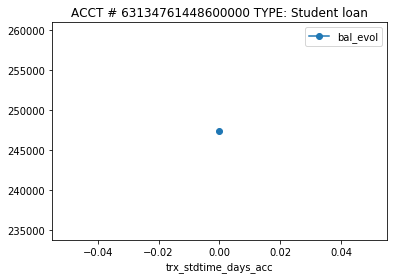

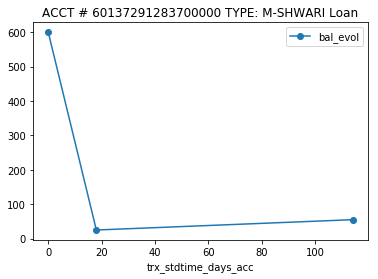

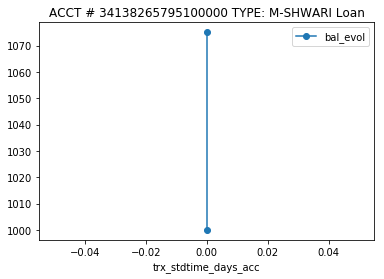

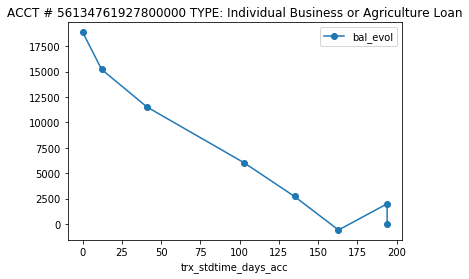

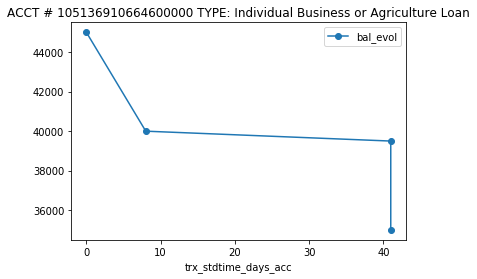

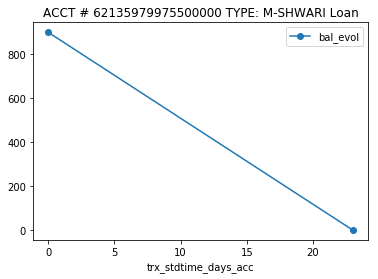

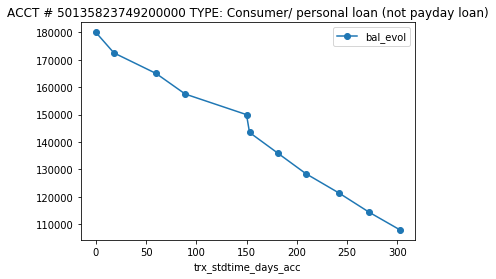

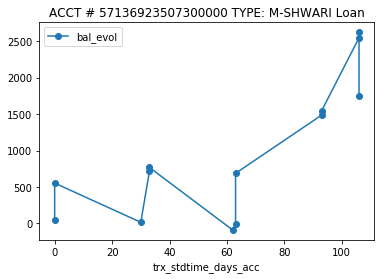

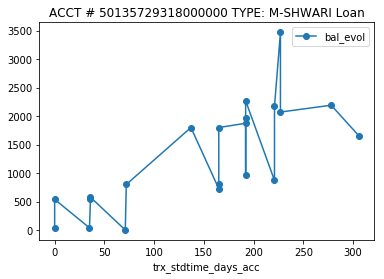

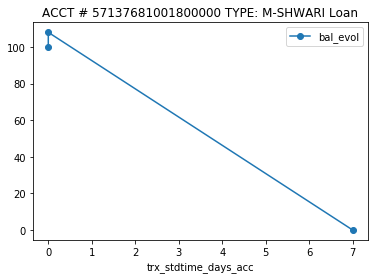

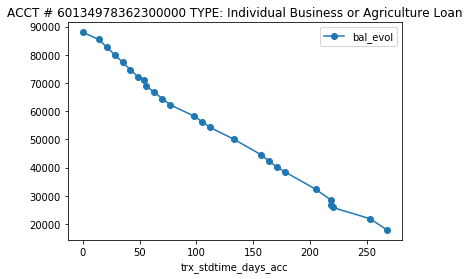

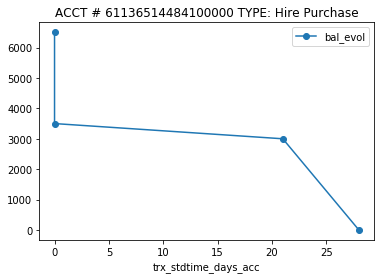

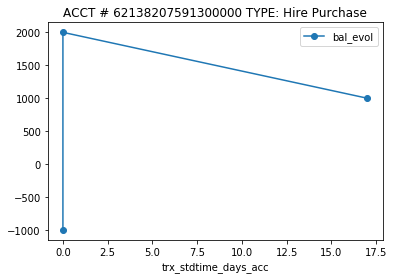

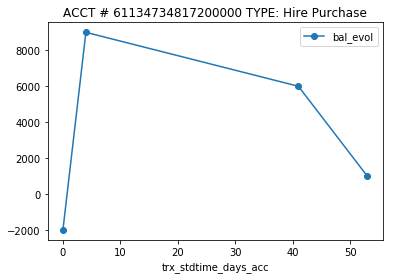

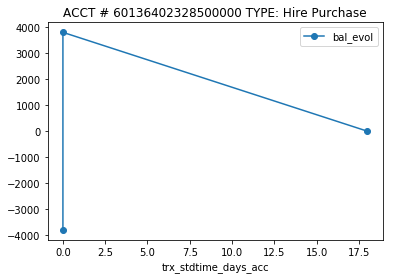

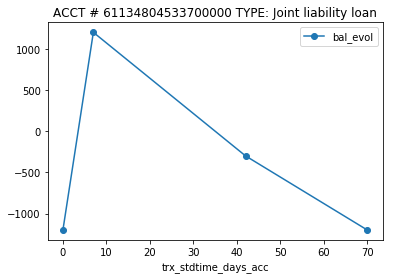

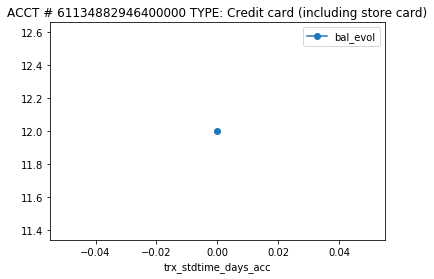

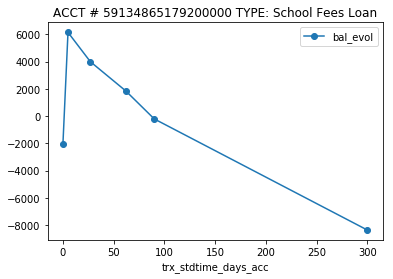

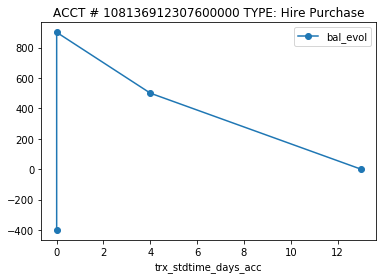

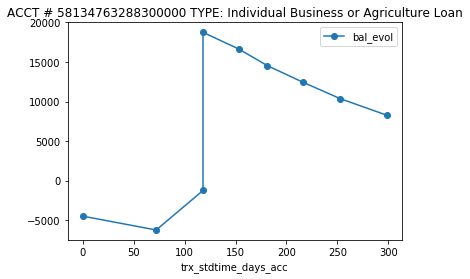

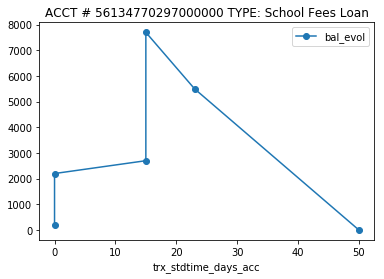

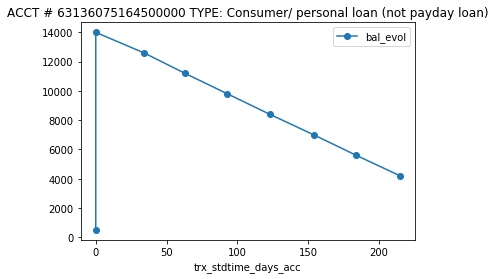

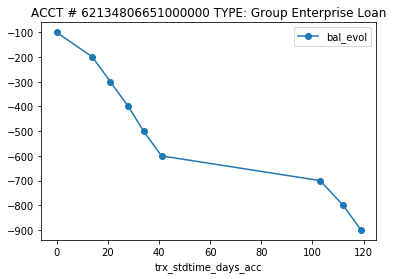

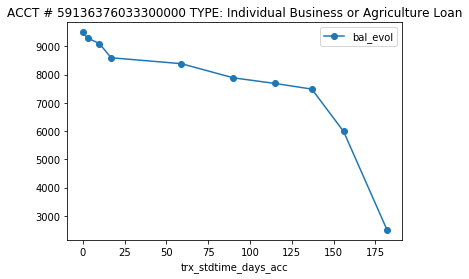

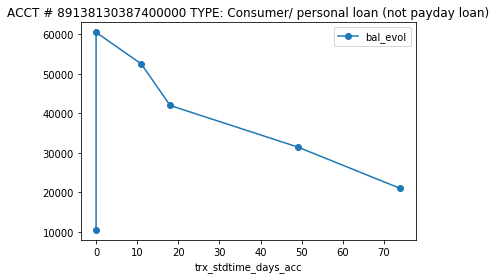

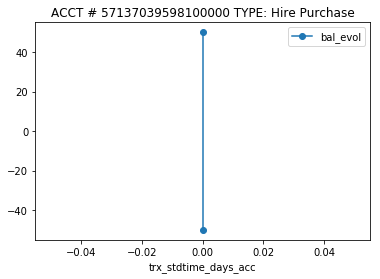

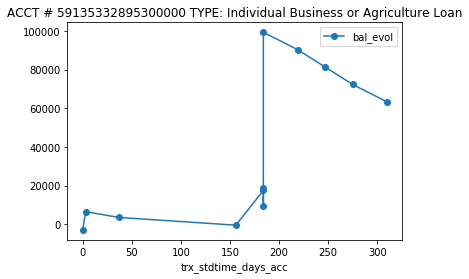

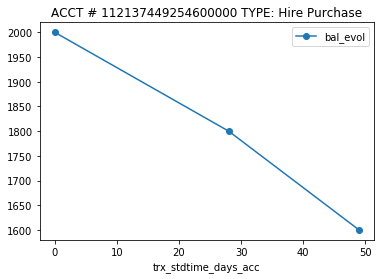

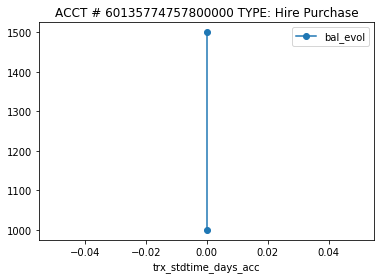

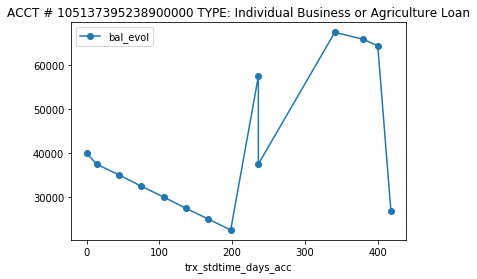

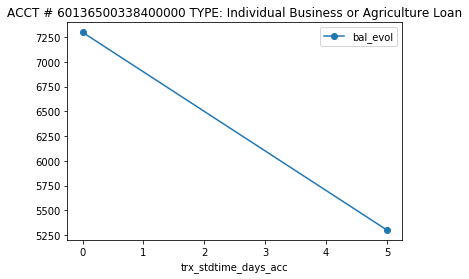

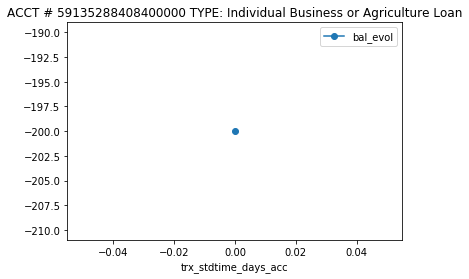

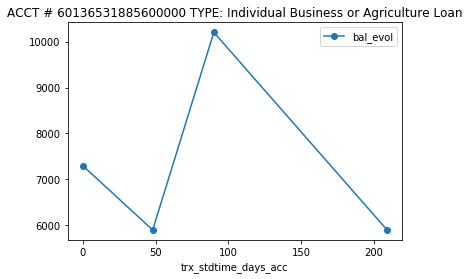

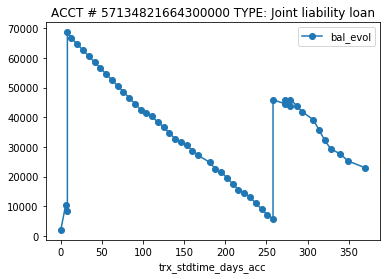

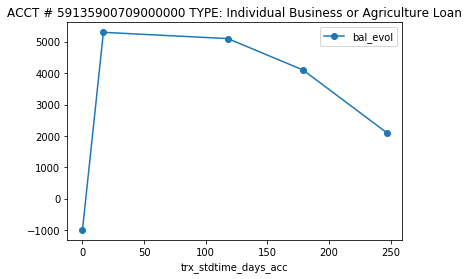

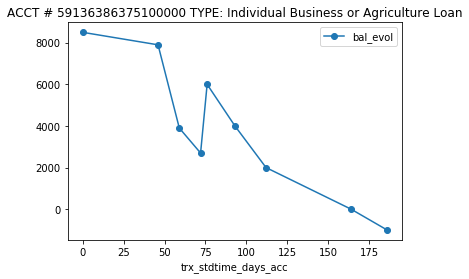

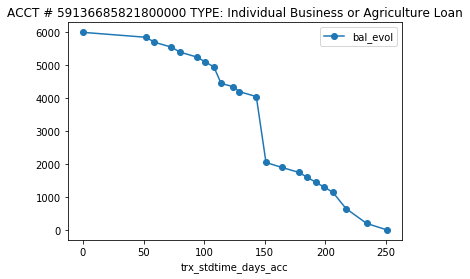

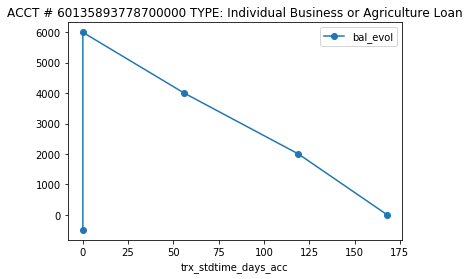

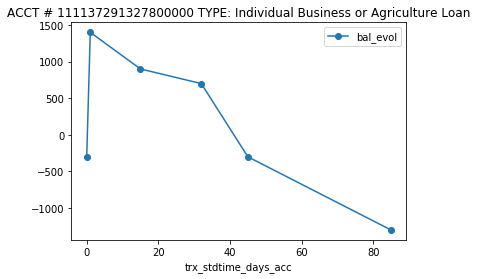

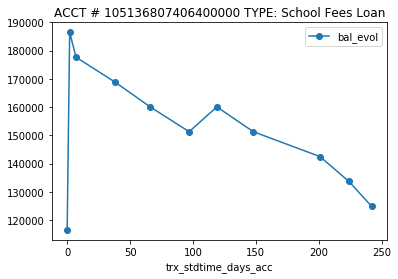

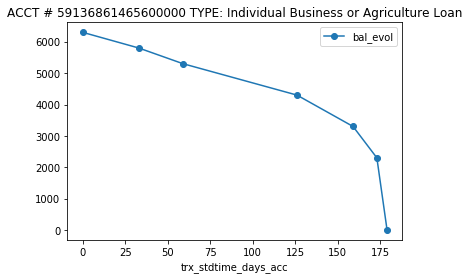

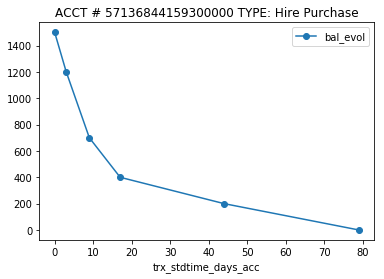

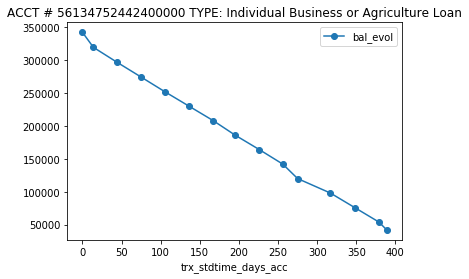

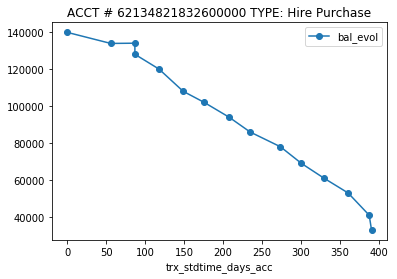

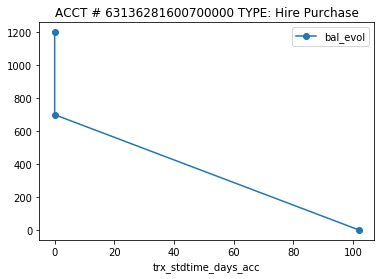

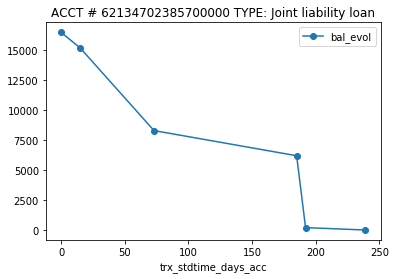

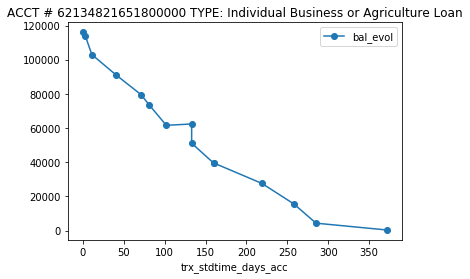

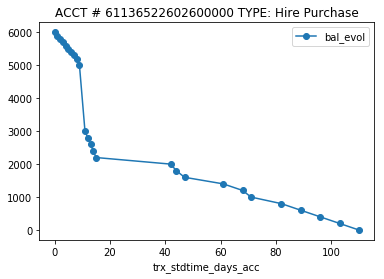

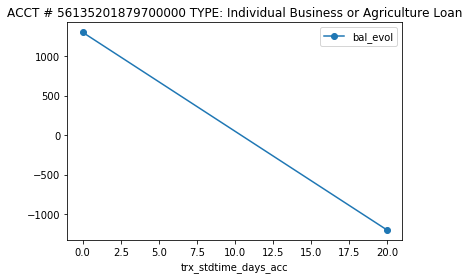

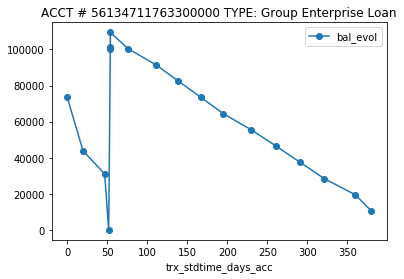

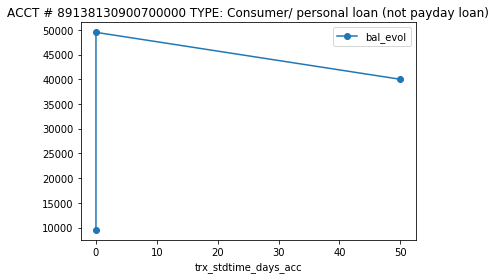

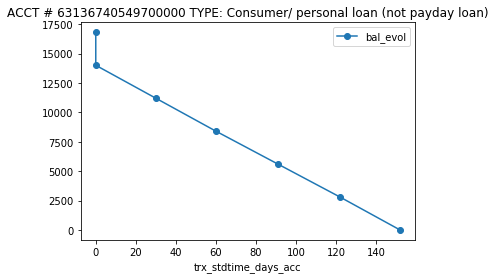

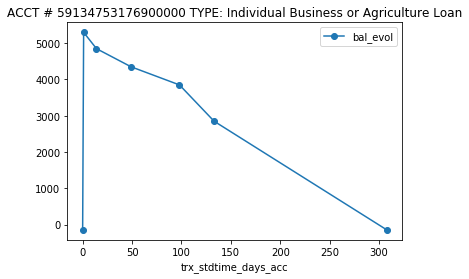

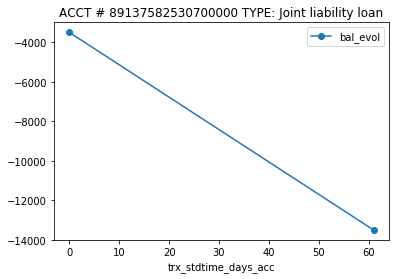

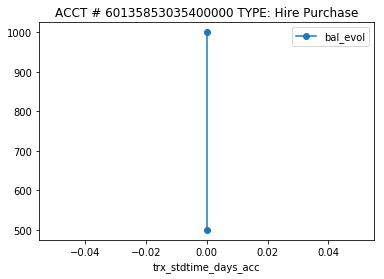

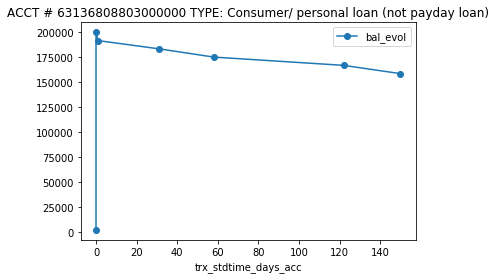

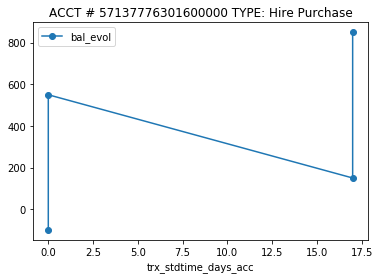

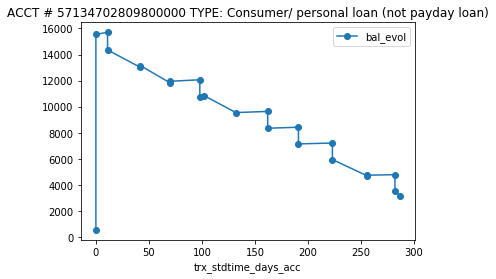

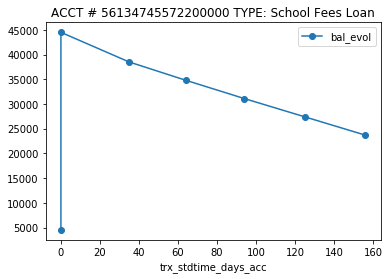

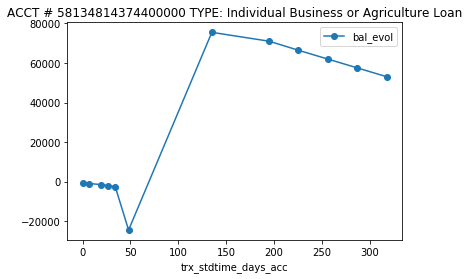

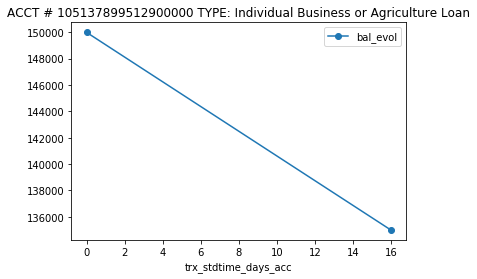

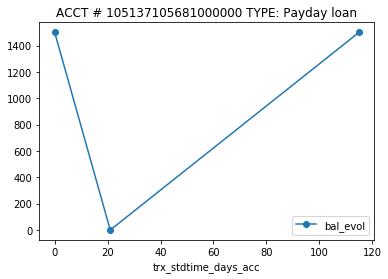

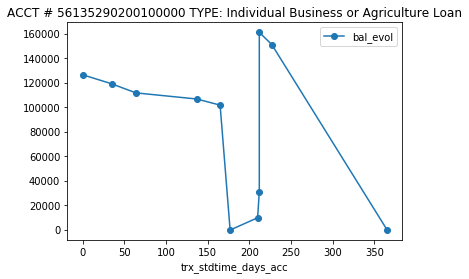

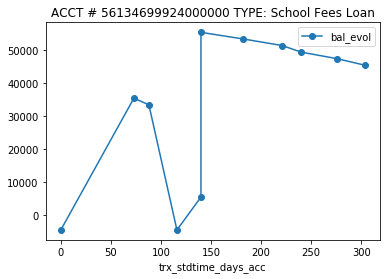

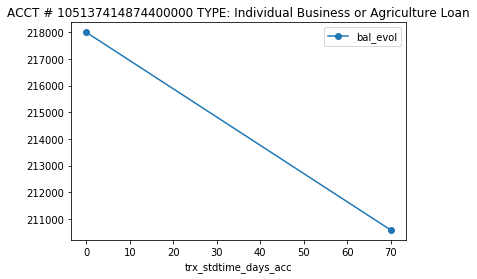

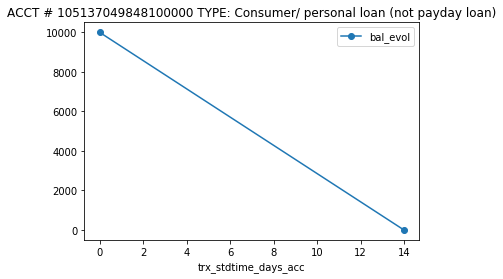

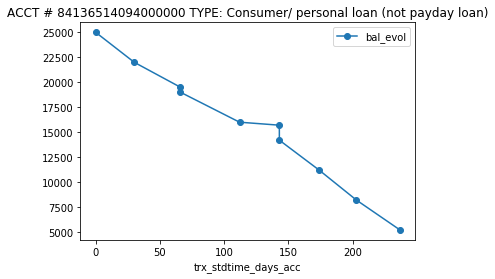

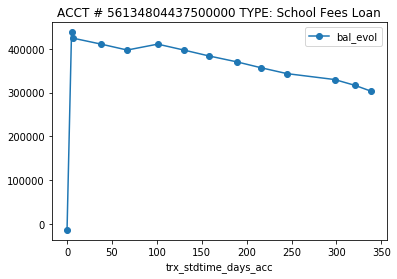

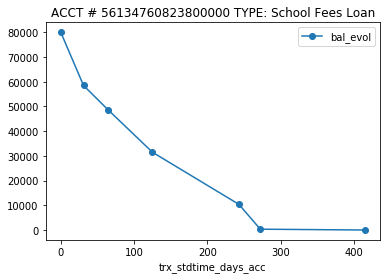

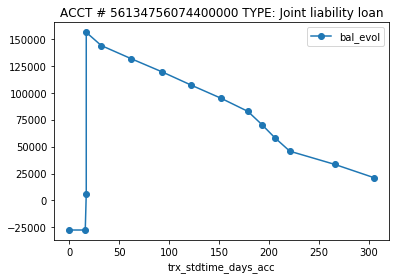

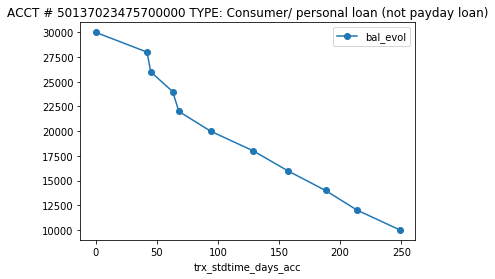

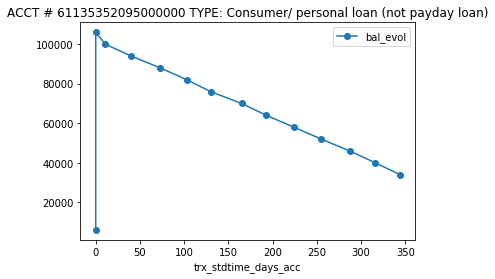

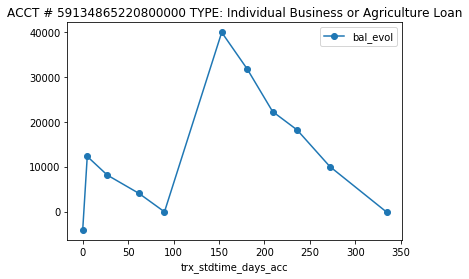

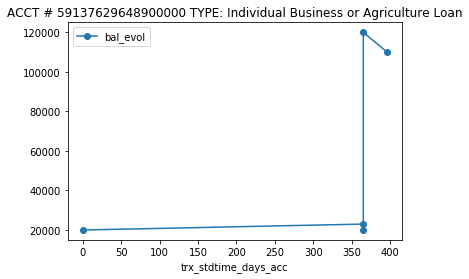

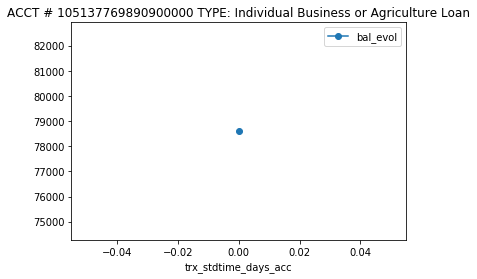

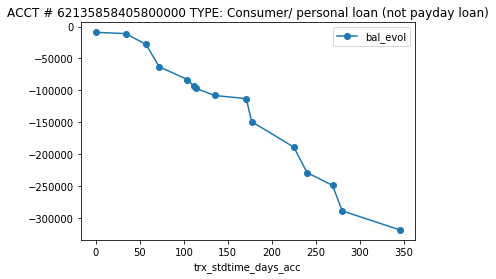

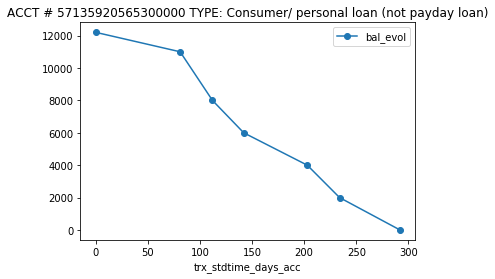

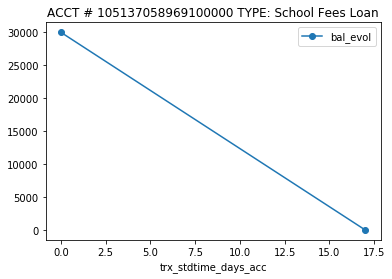

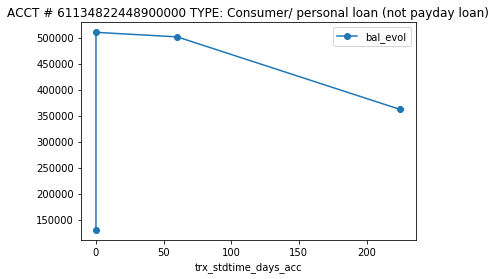

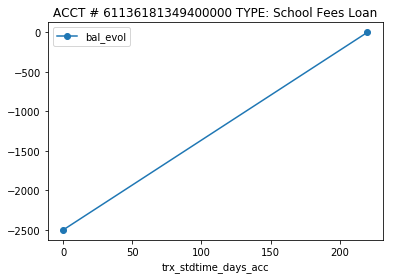

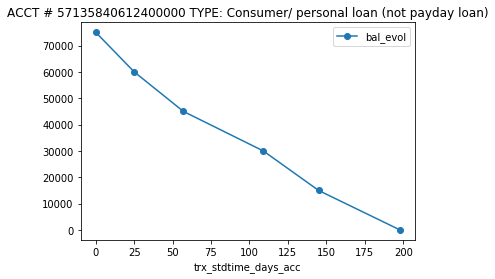

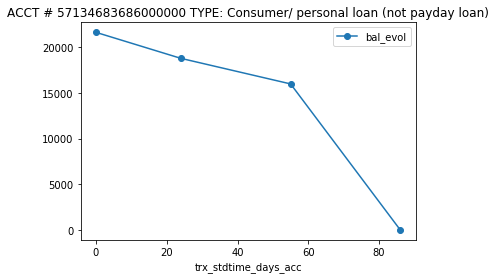

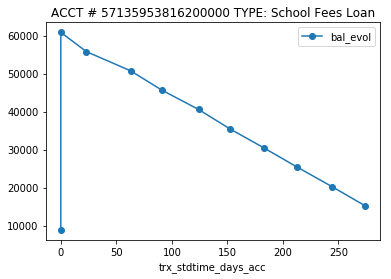

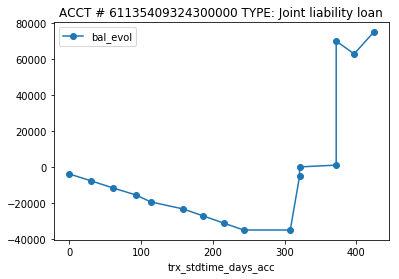

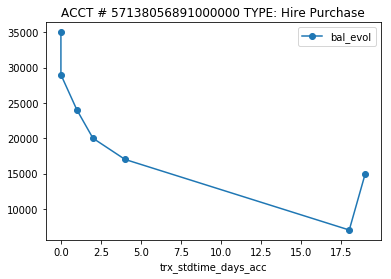

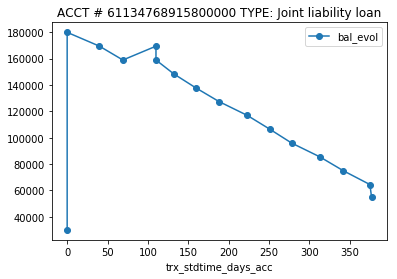

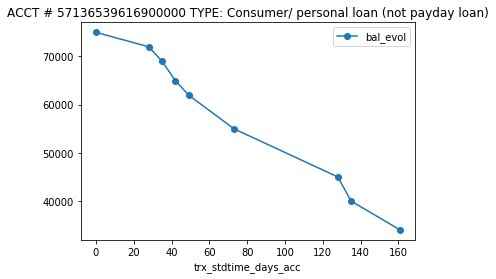

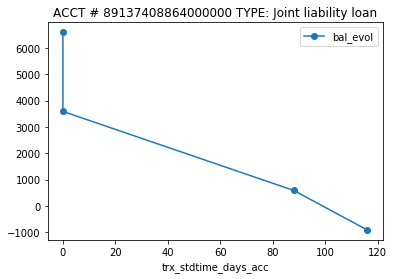

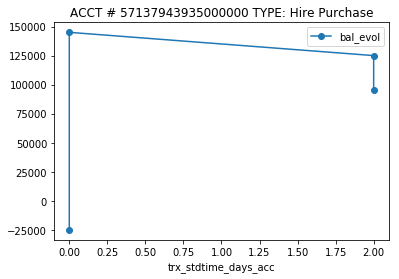

In [12]:
for idx, acct_id in enumerate(list(frmln_trx.loc[frmln_trx['unique_accnts']==1].account_ids)):
    print(idx, acct_id)
    loan_df = frmln_trx.loc[frmln_trx['account_ids']==acct_id]    
    loan_df = loan_df.copy()
    loan_df.sort_values("trx_stdtime_days_acc", inplace=True)
    for index, row in loan_df.iterrows():
        if loan_df.loc[index,"trx_bsheet_direction"]=="Increase":
            loan_df.at[index,"trx_val_dir"] = loan_df.loc[index,"trx_value_kes"]
        elif loan_df.loc[index,"trx_bsheet_direction"]=="Decrease":
            loan_df.at[index,"trx_val_dir"] = -loan_df.loc[index,"trx_value_kes"]
        else:
            print("Error neither increase nor decrease at index" + str(index))
    print(loan_df.shape) 
    if loan_df.shape[0] > 1: 
        loan_df.insert(loan_df.shape[1],"bal_evol",np.zeros(loan_df.shape[0]))
        s=0
        for index,row in loan_df.iterrows():
            s+=loan_df.loc[index,"trx_val_dir"]
            loan_df.at[index,"bal_evol"]=s
        loan_df.plot(x="trx_stdtime_days_acc",y="bal_evol", marker = "o")
        plt.title( 'ACCT # '+str(acct_id)+" TYPE: "+list(loan_df.trx_type_desc)[0])
        plt_name = 'acct_'+str(acct_id)+'_'+str(list(loan_df.trx_type_code)[0])+'.png'
        plt.savefig(plt_name)
    else: 
        print('Loan has only 1 entry for %s' %acct_id)


## Notes on the graphs: 
1. Bus-ag (>250), cons-pers (>100) are good loans to use with a few exceptions.
2. If we remove 3 trx hier_pur, these are pretty good loans
3. Same as (2) with Joint liability
4. Probably shouldn't use M-SHWARI, low duration and very erratic, many have only 2 data points? 
5. School fees are useful
6. Group enterprise is fine to use; only one though

### Definition 1: Is someone paying back any amount of money within a set amount of time for their loan? 

Step 1: Let's just look at the bus-ag loans that have >100 days of obs: 

In [22]:
busag_trx_df = frmln_trx.loc[frmln_trx['trx_type_code']==2760 ]

In [27]:
accts_obs_gt100 = busag_trx_df.loc[busag_trx_df.trx_stdtime_days_acc > 100].account_ids.unique()

In [28]:
busag_trx_gt100_df = busag_trx_df.loc[busag_trx_df['account_ids'].isin(accts_obs_gt100)]

In [31]:
busag_trx_gt100_df.shape

(413, 58)

In [32]:
len(busag_trx_gt100_df.account_ids.unique())

39

Step 2: Let's look at standard deviations of the payment amounts divided by the mean: 

In [43]:
for idx, acct_id in enumerate(list(busag_trx_gt100_df.account_ids.unique())):
    print(idx, acct_id)
    loan_df = frmln_trx.loc[frmln_trx['account_ids']==acct_id]    
    loan_df = loan_df.copy()
    loan_df.sort_values("trx_stdtime_days_acc", inplace=True)
    
    #subset down only to payments
    payment_idxs = [idx for idx, purpose in enumerate(list(loan_df['trx_prx_purpose'])) if 'Payment' in purpose]
    payment_df= loan_df.iloc[payment_idxs]
    
    #figure out a vector of time between payments
    time_btw_payments = np.diff(np.array(payment_df.trx_stdtime_days_acc))
    
    print('time btw payments', time_btw_payments)
    print('std of time btw payments', np.std(time_btw_payments))
    print('mean of payment amount', np.mean(payment_df.trx_value_kes))
    print('-------------------------')
    
    

0 60137430710900000
time btw payments [31 34]
std of time btw payments 1.5
mean of payment amount 11233.333333333334
-------------------------
1 105136540140100000
time btw payments [74 30 31 31 30]
std of time btw payments 17.405746177627663
mean of payment amount 7166.666666666667
-------------------------
2 56134761927800000
time btw payments [29 62 32 28 31]
std of time btw payments 12.877888025604198
mean of payment amount 3575.0
-------------------------
3 105137049319900000
time btw payments [52 24 18]
std of time btw payments 14.817407180595245
mean of payment amount 11098.0
-------------------------
4 56134798164800000
time btw payments [195  28  81  31  11]
std of time btw payments 67.09515630803762
mean of payment amount 4750.0
-------------------------
5 59134726342000000
time btw payments [29 27  5 48 38 35 36  9 41 39 29]
std of time btw payments 12.52171667263527
mean of payment amount 566.6666666666666
-------------------------
6 59134753176900000
time btw payments [ 14

/Users/juliacluceru/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/juliacluceru/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/juliacluceru/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
